INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de suivi avec mean-shift. 

In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Lecture de l'image initiale. Elle servira à créer le modèle de l'objet à suivre.

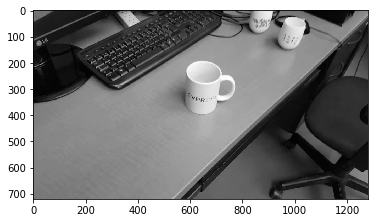

In [2]:
image = cv2.imread('in000115.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

Définition du rectangle englobant autour de la tasse. Si on inclut l'anse, le suivi ne fonctionnera pas, car trop d'arrière-plan sera inclut.

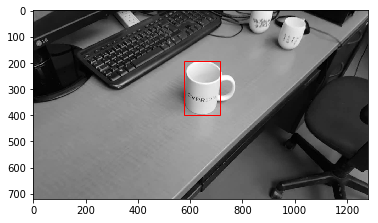

In [3]:
y1 = 192
y2 = 400
x1 = 575
x2 = 715 #avec anse : 770
# Centre du rectangle englobant.
prevcentrex = (x2+x1)/2.0
prevcentrey = (y2+y1)/2.0
fig,ax = plt.subplots(1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Création d'un masque qui pemettra de calculer l'histogramme seulement dans la région du rectangle englobant. Affichage de l'image avec le masque. Et affichage de l'histogramme.

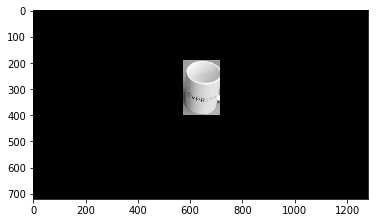

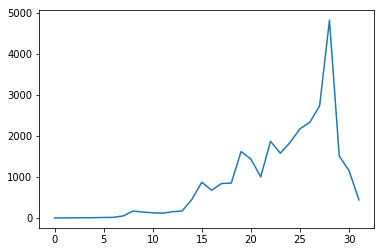

In [4]:
mask = np.zeros(image.shape[:2], np.uint8)
mask[y1:y2, x1:x2] = 255  
masked_image = cv2.bitwise_and(image,image,mask = mask)
#L'histogramme est quantifié sur 32 niveaux. 
hist_mask = cv2.calcHist([image],[0],mask,[32],[0,256])
plt.imshow(masked_image, cmap = plt.get_cmap('gray'))
plt.show()
plt.plot(hist_mask)
plt.show()

Lecture d'une image subséquente dans la séquence vidéo avec le rectangle englobant de l'image initiale en superposition. 

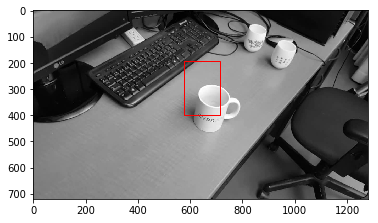

In [5]:
image = cv2.imread('in000129.jpg',cv2.IMREAD_GRAYSCALE)
fig,ax = plt.subplots(1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

On n'est pas bien aligné, donc il faut appliquer la procédure mean-shift. On substitue les valeurs de tons de gris par leur nombre d'occurences dans l'histogramme calculé précédemment. Affichage de l'image des "masses".

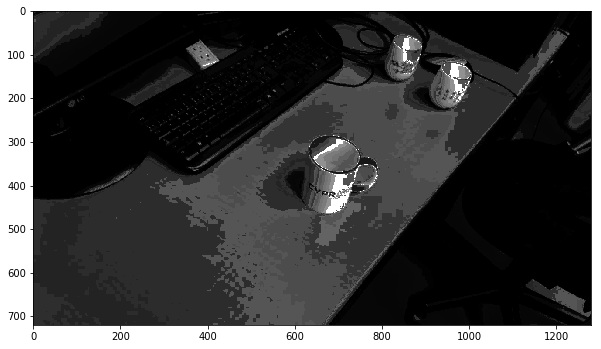

In [6]:
imagemasse = np.zeros(image.shape[:2])
for i in range(0,len(image)):
    for j in range(0,len(image[0])):
        imagemasse[i,j] = hist_mask[int(image[i,j]/8)]
plt.figure(figsize = (10,10))
plt.imshow(imagemasse/max(hist_mask), cmap = plt.get_cmap('gray'))
plt.show()

Application de la procédure mean-shift jusqu'à convergence. 

658.4410259505164
305.0893207820019
588 728 201 409


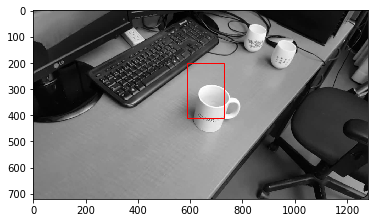

670.4773449655662
314.375608888525
600 740 210 418


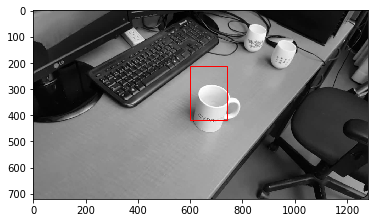

680.487558593382
324.1629697172175
610 750 220 428


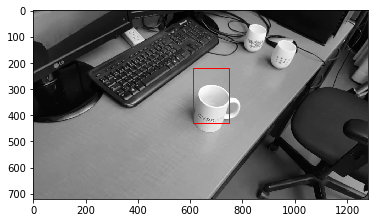

688.1497640430712
334.5783957787716
618 758 230 438


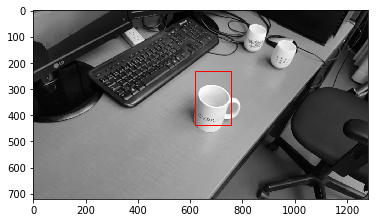

693.1371354029308
345.3238119708502
623 763 241 449


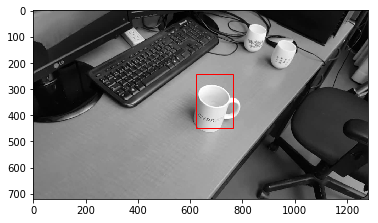

696.1031621635228
356.295256031812
626 766 252 460


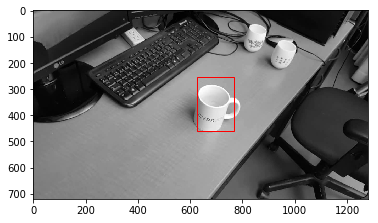

697.5669031786747
366.6044329807276
627 767 262 470


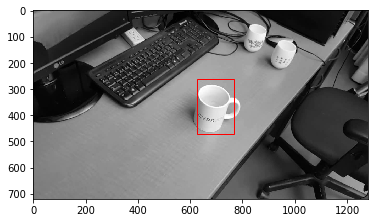

697.7838100465358
374.0648134815416
627 767 270 478


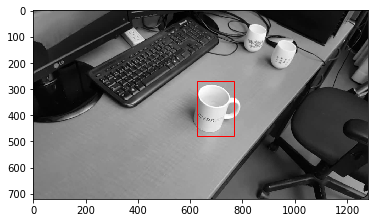

697.5397709919725
379.4544232514908
627 767 275 483


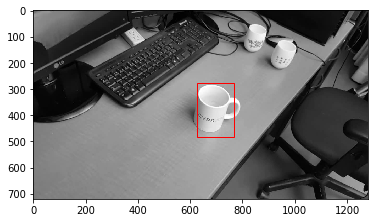

697.3926475741164
382.83107629950126
627 767 278 486


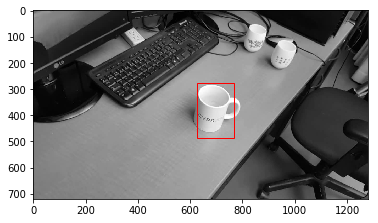

697.2929176309752
384.86211971876054
627 767 280 488


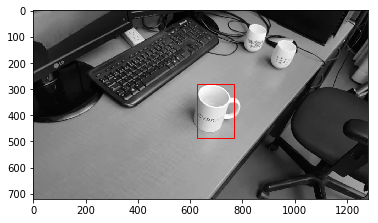

697.2238965970448
386.2204074948535
627 767 282 490


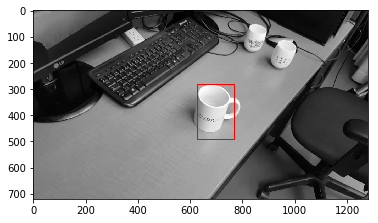

697.1666372527756
387.52291487218645
627 767 283 491


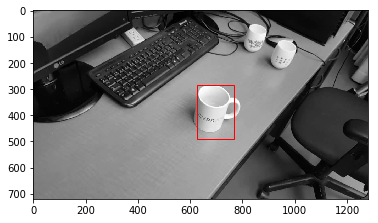

In [7]:
centrex = 0
centrey = 0
# On arrete quand le déplacement du rectangle englobant est plus petit ou égal à 2
while math.sqrt(math.pow(centrex - prevcentrex,2) + math.pow(centrey - prevcentrey,2))>2:
    centrex = 0
    centrey = 0
    massetot = 0
    prevcentrex = (x2+x1)/2.0
    prevcentrey = (y2+y1)/2.0
    #Calcul des centres de masse pour x et y
    for i in range(y1, y2):
        for j in range(x1, x2):
            massetot += imagemasse[i,j]
            centrex += j*imagemasse[i,j]
            centrey += i*imagemasse[i,j]
    centrex = centrex/massetot
    centrey = centrey/massetot
    # Calcul des coordonnées du nouveau rectangle englobant pour le nouveau centre calculé.
    x1 = int(x1 + (centrex - prevcentrex))
    x2 = int(x2 + (centrex - prevcentrex))
    y1 = int(y1 + (centrey - prevcentrey))
    y2 = int(y2 + (centrey - prevcentrey))
    print(centrex)
    print(centrey)
    print(x1,x2,y1,y2)
    
    fig,ax = plt.subplots(1)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    